# The three basic types of problems
## Artificial Intelligence 1
### Lecture 1, part 2
Jim Smith

# The Big Idea
(parts of) computers do things in a sequence

<div >
<div style="float:left; width: 25%;">
    <h3>Input</h3> 
    <ul>
        <li>keyboard</li>
        <li> mouse</li>
        <li> joystick</li>
        <li> camera</li>
        <li>microphone</li>
        <li><b> another computer or programme</b></li>
     </ul>

  </div>
 
    
 <div style = "float:left;width:5%">
 <br><br><br>   <span style='font-size:50px;'>&#8680;</span>
 </div>
    
<div  style="float:left; width:30%;background:lightblue">
    <h3>Model</h3>
    <p>of a process or part of the world</p>
    <ul>
        <li>designed by a person</li>
        <li> or learned by an algorithm</li>
    </ul>
</div>

<div style = "float:left;width:5%">
 <br><br><br>   <span style='font-size:50px;'>&#8680;</span>
</div>

 <div style="float:left; width:25%">
    <h3>Output</h3> 
    <ul>
        <li>screen</li>
        <li> motor</li>
        <li>loudspeaker</li>
        <li><b> another computer or programme</b></li>
     </ul>
</div>
<br style="clear:left;"/>        
 </div>




## For example, this notebook is just a model.

Made of up some 
- generic parts: markdown, html, reveal.js, python
- and some specific parts: the slide content 

The inputs are my mouse/keyboard presses.

### But a call to a simple function also fits this viewpoint.

In [16]:
input = "this is a message to show"

"""
print() is a model 
of the process of drawing 
something on screen
 it's much easier than 
worrying about pixels!
"""
print(str.upper(input))

THIS IS A MESSAGE TO SHOW


# Big Idea Part 2:
Problem Solving <==> one of the three parts is missing.

Different types of problem are associated with different questions.

<div >
<div style="float:left; width: 30%;">
    <h3>Input</h3> 
    <ul>
        <li>how do I?</li>
        <li> what's the best/quickest/...?</li>
     </ul>
    
  </div>

 <div style = "float:left;width:5%">
<br> <br>.
 </div>

    
    
<div style="float:left; width:30%;background:lightblue">
    <h3>Model</h3>
    <ul>
        <li>how does X relate to Y?</li>
        <li>how do these symptoms link to diagnosis?</li>
    </ul>
</div>

<div style = "float:left;width:5%">
<br> <br>.
 </div>
    
 <div style="float:left; width:30%">
  <h3>Output</h3> 
    <ul>
        <li>who/what is this?</li>
        <li> what will happen if ...?</li>
        <li>what will the next ... be?</li>
     </ul>
</div>
<br style="clear:left;"/>        
 </div>

# So we can define three types of problem

<div >
<div style="float:left; width: 30%;border:2px">
    <h3>Optimisation</h3>
    <h4>Given</h4>
    <ul>
        <li>A model of the situation</li>
        <li>Some constraints about the output</li>
     </ul>
    <p><b>Find</b> the  inputs that produce the desired output.
    <br>Sometimes called <b><i>planning</i></b> when the answer is a sequence of inputs.</p>
  </div>
 
<div style = "float:left;width:5%">
<br> <br>.
 </div>
    
<div  style="float:left; width:30%;background:lightblue">
    <h3>Modelling</h3>
    <h4>Given:</h4>
    <ul>
        <li> A set of inputs (examples)</li>
        <li> corresponding outputs/labels</li>
       </ul>
    <p>
    <b>Find</b> the model that:</p>
       <ul>
        <li>Maps the known inputs onto their outputs</li>
           <li> And generalises to new cases</li>
       </ul>
</div>


 <div style = "float:left;width:5%">
<br> <br>.
 </div>


 <div style="float:left; width:30%">
  <h3>Prediction</h3> 
     <h4>Given:</h4>
    <ul>
        <li>a model of the situation / process</li>
        <li> some inputs</li>
     </ul>
     <p><b>Find</b> the correct (or most likely) output (prediction)</p>
</div>
<br style="clear:left;"/>        
 </div>

# Optimisation Example: Travelling Salesperson Problem
Work out the quickest way to visit a set of cities, going through each exactly once.

In [17]:
import random, numpy as np, math, matplotlib.pyplot as plt
import w1_utils

# place cities in random positions
num_cities = 10

[[19, 75], [99, 67], [34, 60], [28, 42], [95, 90], [44, 62], [99, 39], [53, 67], [84, 38], [28, 14]]


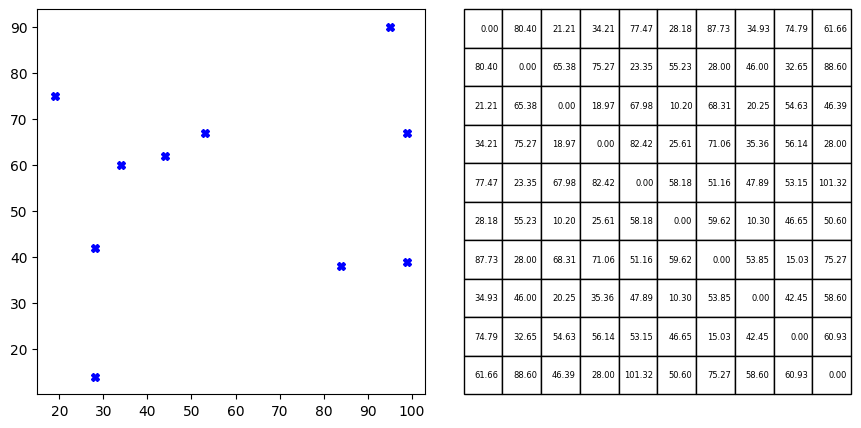

In [18]:
cities = [random.sample(range(100), 2) for x in range(num_cities)]
print(cities)

model = w1_utils.get_distances(cities)
w1_utils.plot_cities(cities, model)

### Model: the matrix of distances between cities
### Output: A tour that visits each city exactly once

- Condition on output:   Try to minimise tour length

### Optimisation Algorithm: greedy constructive search
- Starts with random city then repeatedly adds edge to closest unvisited city.
- Not very good, but illustrates the point

In [19]:
def greedyConstructiveTourBuilder(start=0):
    # set up
    used = np.zeros(num_cities, dtype="int")
    tour = []  #  a list of cities in the order we vist them
    # start
    tour.append(start)
    used[start] = 1

    while len(tour) < num_cities:  # loop through stops on the tour
        min_dist = 10000
        for k in range(num_cities):
            this_dist = model[tour[-1]][k]  # tour[-1] is last place in current tour
            if not used[k] and this_dist < min_dist:
                min_dist = this_dist
                closest = k
        tour.append(closest)
        used[closest] = 1
    return tour

tour is [4, 1, 6, 8, 7, 5, 2, 3, 9, 0] starting from 4


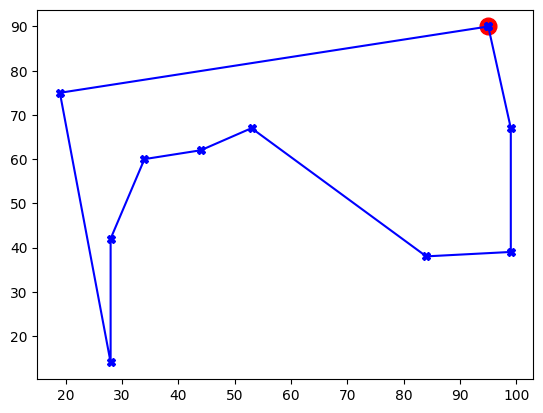

In [20]:
start = random.randint(0, num_cities - 1)
tour = greedyConstructiveTourBuilder(start)
print(f"tour is {tour} starting from {start}")
w1_utils.show_tour(cities, tour, start)

# Other example optimisation problems
- finding set of parameters for a design
 - 'look and feel' of a web page via CSS
 - component sizes and materials for physical design
 -  grouping data and methods into classes in software design
- path-finding
- action planning  in games, robotics,...

# Modelling example:
### Learning a model from examples of fruit

Starting by making a dataset describing some fruit (see next notebook)


ValueError: 'c' argument has 90 elements, which is inconsistent with 'x' and 'y' with size 30.

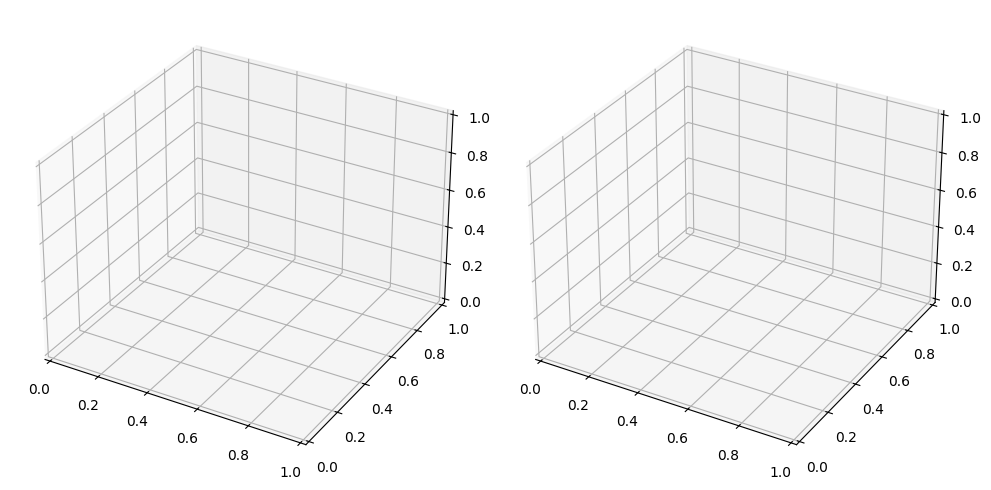

In [21]:
import w1_utils, numpy as np, matplotlib.pyplot as plt

np.set_printoptions(precision=2)

feature_values, labels = w1_utils.make_fake_fruit()
fig = w1_utils.make3dscatters(feature_values, labels)
plt.show()

Then reminding ourselves what the dataset looks like 

In [ ]:
for feats, label in zip(feature_values, labels):
    print(feats, label)

## Use a simple Decision Tree Classifier algorithm to learn a model

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


model = DecisionTreeClassifier()  ## <<<<< make an empty decision tree object
model.fit(
    feature_values, labels
)  ## <<<<< call "fit" to learn decision boundaries from data

feature_names = ["Red", "Green", "Blue", "Width", "Height", "Weight"]
fruit_types = ["apple", "orange", "banana"]
theTree = plot_tree(
    model,
    feature_names=feature_names,
    class_names=fruit_types,
    label="none",
    filled=True,
    impurity=False,
    fontsize=10,
    rounded=True,
)

# Other Modelling Examples:
- Getting expertise from a person and coding that up in a rule base
 - e.g. a chatbot
 
- more on this in the next video and Weeks 10-12

# Prediction Example: 
## Using the learned model to predict the type of a new bit of fruit
<img style="float:left" src = "figs/lime.jpg">
 
 - RGB = (50,205,50)
 - size = 40mm, round
-  weight = 44g

In [ ]:
new_fruit_features = np.array(
    [50, 205, 50, 40, 40, 44]
)  ## (R,G,B, width,height,weight)
prediction = model.predict(new_fruit_features.reshape(1, -1))  ## array of predictions
print(
    f"For a new fruit with features {new_fruit_features} the prediction is {prediction[0]}"
)

# Other prediction examples

- Face Recognition
- Voice Recognition ( Speech To text)
- Auto-captioning videos 
- Time series prediction
 - spread of Covid-19
 - e.g. air quality tomorrow so measures can be taken

# Take Home Message
- Problem solving <=> finding the right choice for the 'missing piece'
- This gives us  a way of:
 - breaking up big problems into little ones
 - identfying what type of problem each sub-problem is
 - and so identifying the right technology to use for that sub-problem
 
## You need to:
- learn the names of the three types of problem, 
- and what kind of question they correspond to
- practise identfying what type of problem you have